In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('Data_Negara_HELP.csv')
df.head()
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

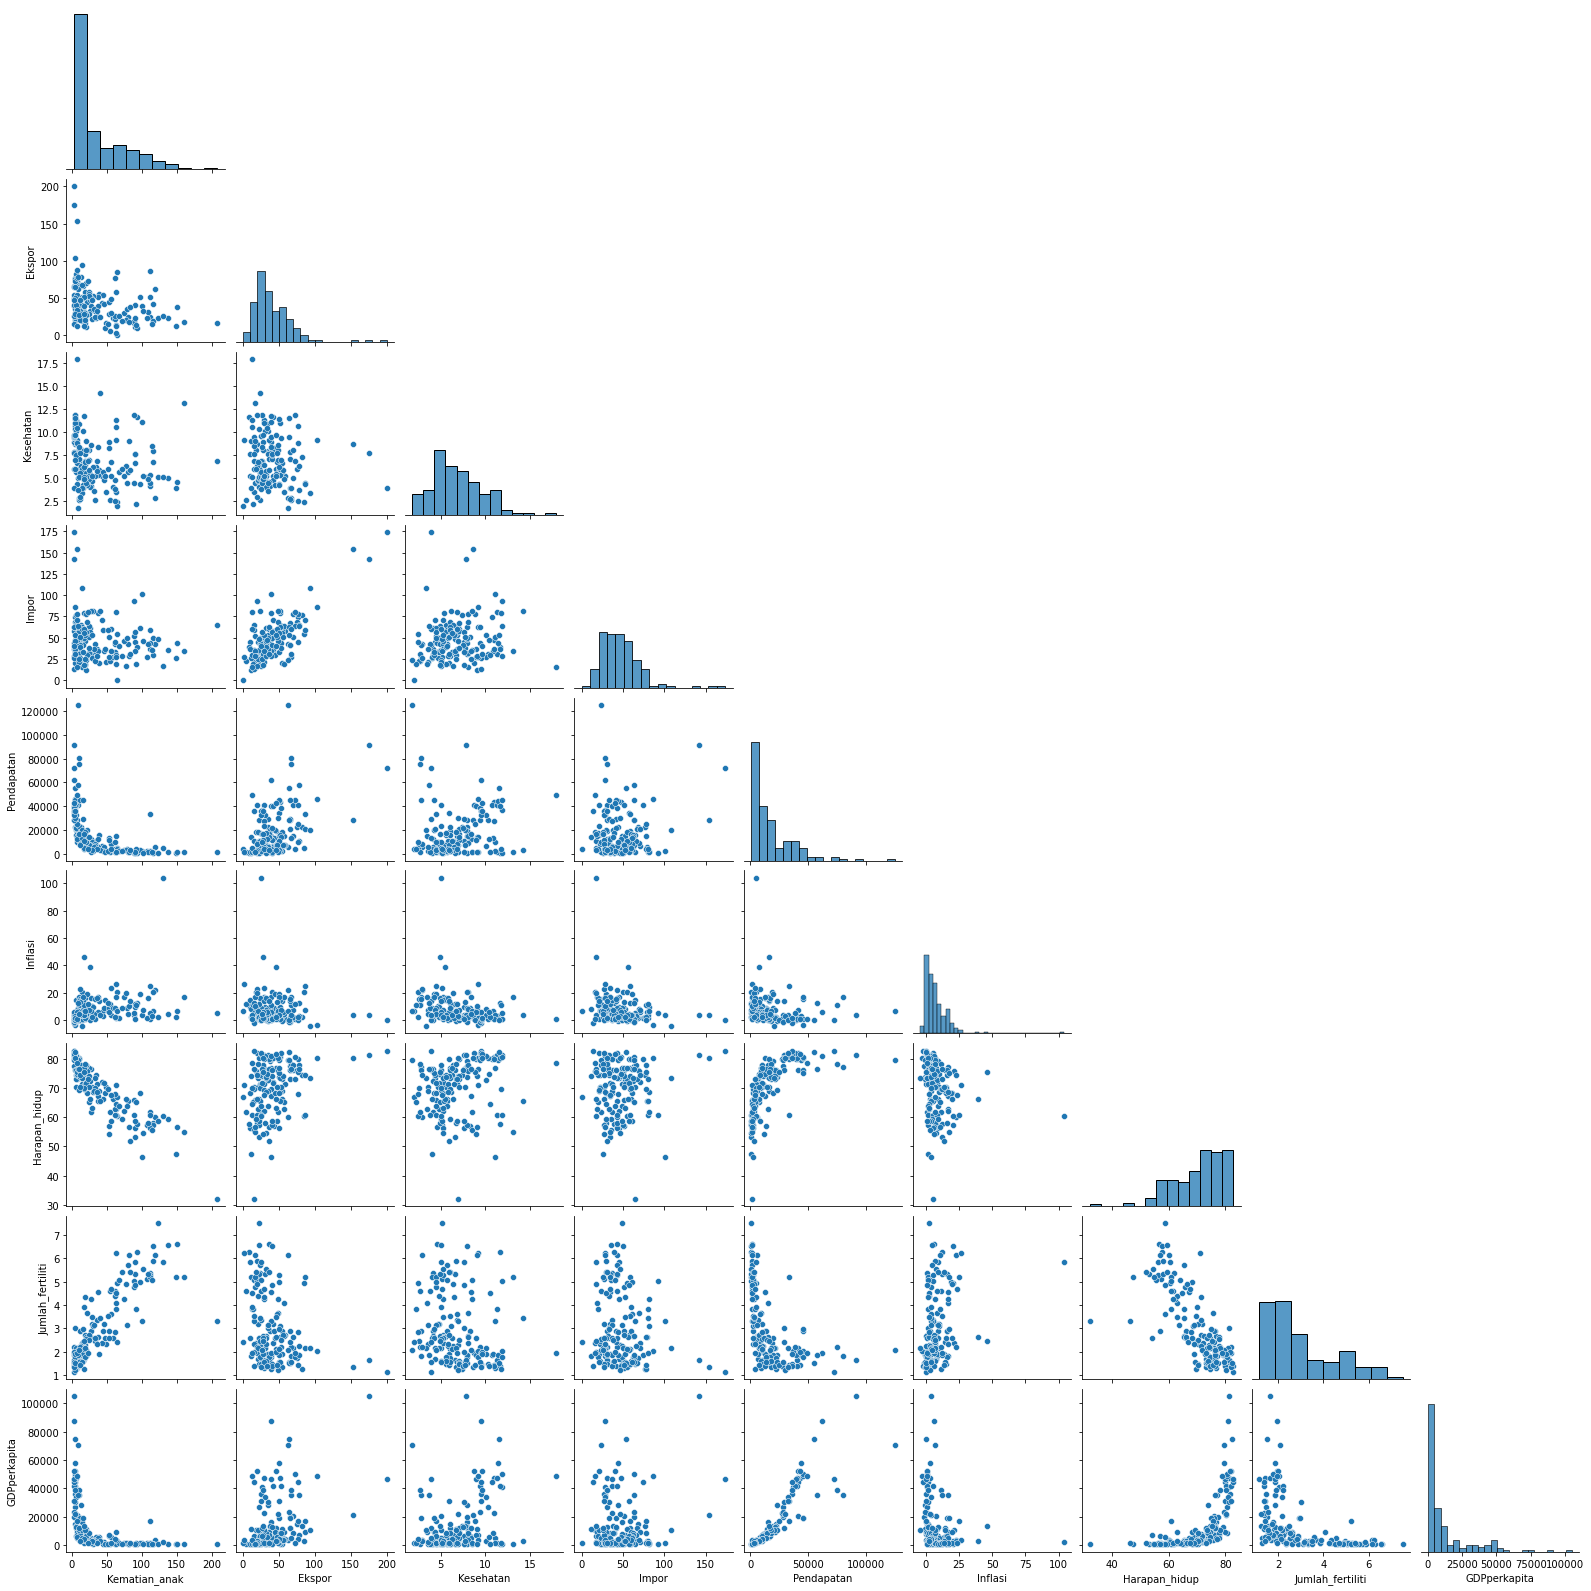

In [8]:
#pairplot data df asli
sns.pairplot(df, corner=True);

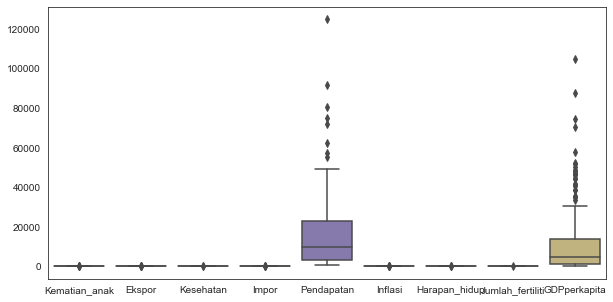

In [9]:
#boxplot w/ outliers
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(data=df);

In [10]:
def remove_outliers(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    lower_lim= Q1-(1.5*IQR)
    upper_lim= Q3+(1.5*IQR)
    df_final = df[(df>lower_lim) & (df<upper_lim)]
    return df_final

def count_outliers(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_outliers = df[(df<=(Q1-1.5*IQR)) | (df>=(Q3+1.5*IQR))]
    return df_outliers.shape[0]

In [11]:
#fungsi helper
def remove_all_outliers(df):
    loop_count = 0
    outlier_count = count_outliers(df)

    while outlier_count > 0:
        loop_count += 1

        if (loop_count > 100):
            break

        df = remove_outliers(df)
        outlier_count = count_outliers(df)
    
    return df

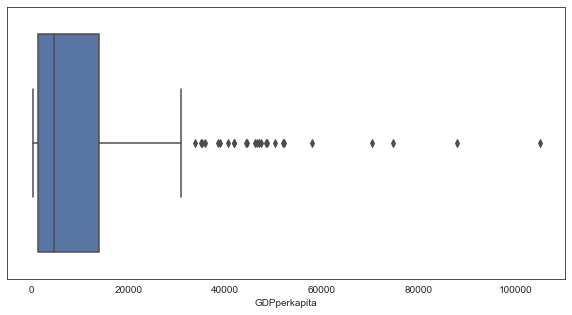

In [12]:
#GDP w/ outliers
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(x=df['GDPperkapita']);

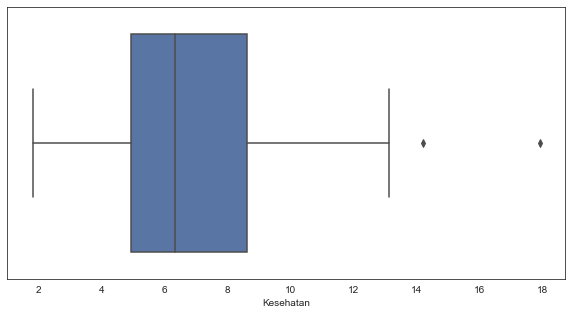

In [13]:
#Kesehatan w/ outliers
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(x=df['Kesehatan']);

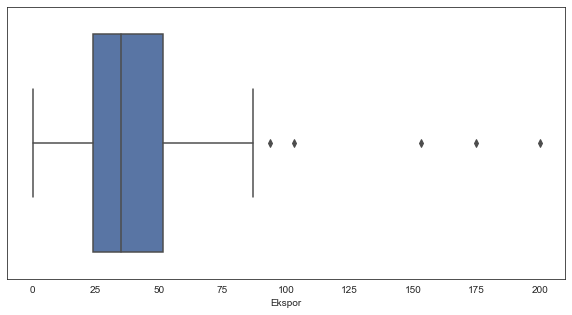

In [14]:
#Ekspor w/ outliers
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(x=df['Ekspor']);

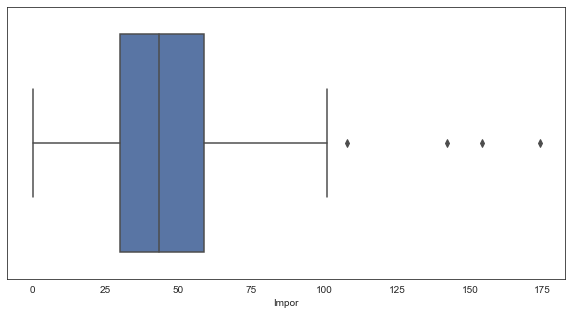

In [15]:
#Impor w/ outliers
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(x=df['Impor']);

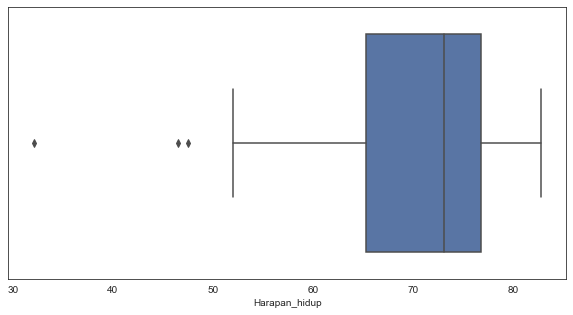

In [16]:
#Harapan_hidup w/ outliers
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(x=df['Harapan_hidup']);

In [17]:
df_fullremoved_outliers=remove_all_outliers(df[['Kematian_anak','Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Jumlah_fertiliti','Harapan_hidup','GDPperkapita']])
df_fullremoved_outliers.fillna(method='ffill', inplace=True)
df_fullremoved_outliers

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Jumlah_fertiliti,Harapan_hidup,GDPperkapita
0,90.2,10.0,7.58,44.9,1610.0,9.44,5.82,56.2,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,1.65,76.3,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,2.89,76.5,4460.0
3,119.0,62.3,2.85,42.9,5900.0,16.10,6.16,60.1,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,2.13,76.8,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950.0,2.62,3.50,63.0,2970.0
163,17.1,28.5,4.91,17.6,16500.0,2.62,2.47,75.4,13500.0
164,23.3,72.0,6.84,80.2,4490.0,12.10,1.95,73.1,1310.0
165,56.3,30.0,5.18,34.4,4480.0,12.10,4.67,67.5,1310.0


In [18]:
col_name = 'Negara'
df_neg = df[['Negara']]
df_fullremoved_outliers.insert(0, col_name, df_neg)

In [19]:
df_fullremoved_outliers

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Jumlah_fertiliti,Harapan_hidup,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,5.82,56.2,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,1.65,76.3,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,2.89,76.5,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,16.10,6.16,60.1,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,2.13,76.8,12200.0
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,3.50,63.0,2970.0
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,2.62,2.47,75.4,13500.0
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,1.95,73.1,1310.0
165,Yemen,56.3,30.0,5.18,34.4,4480.0,12.10,4.67,67.5,1310.0


In [20]:
df_fullremoved_outliers.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Jumlah_fertiliti    0
Harapan_hidup       0
GDPperkapita        0
dtype: int64

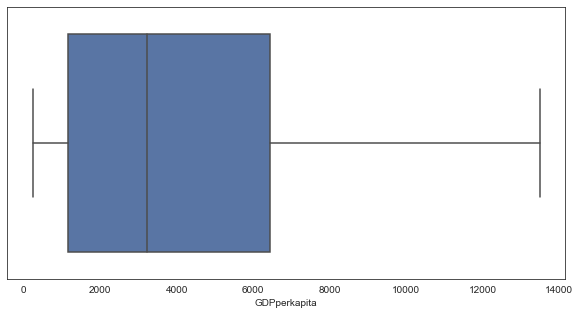

In [21]:
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(x=df_fullremoved_outliers['GDPperkapita']);

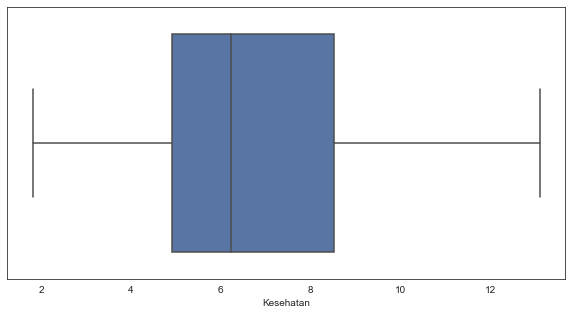

In [22]:
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(x=df_fullremoved_outliers['Kesehatan']);

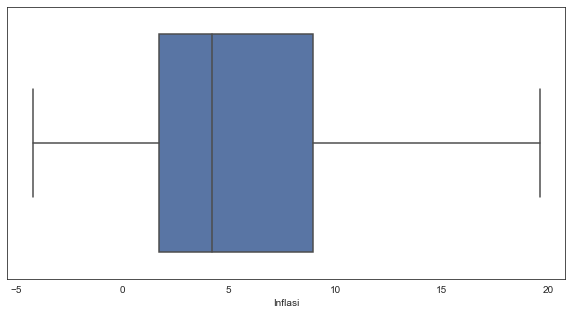

In [23]:
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(x=df_fullremoved_outliers['Inflasi']);

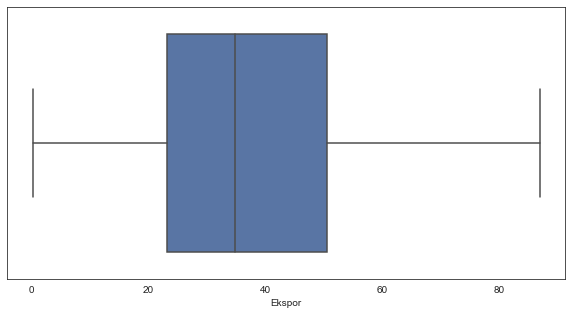

In [24]:
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(x=df_fullremoved_outliers['Ekspor']);

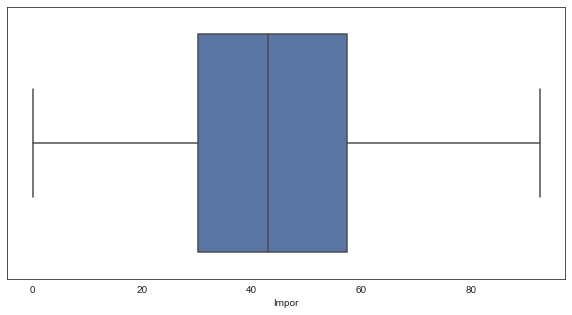

In [25]:
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(x=df_fullremoved_outliers['Impor']);

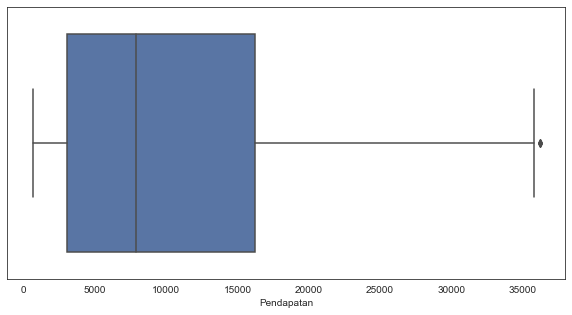

In [26]:
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(x=df_fullremoved_outliers['Pendapatan']);

#tersisa outliers

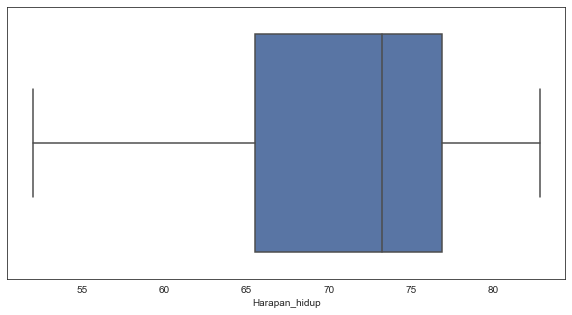

In [27]:
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(x=df_fullremoved_outliers['Harapan_hidup']);

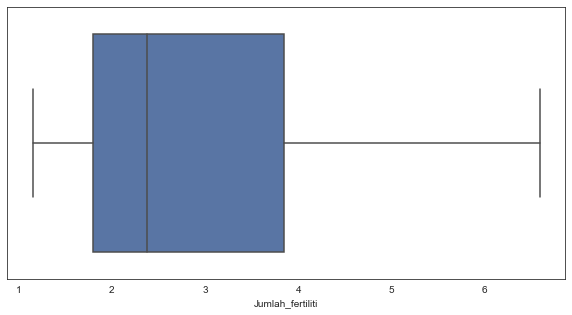

In [28]:
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(x=df_fullremoved_outliers['Jumlah_fertiliti']);

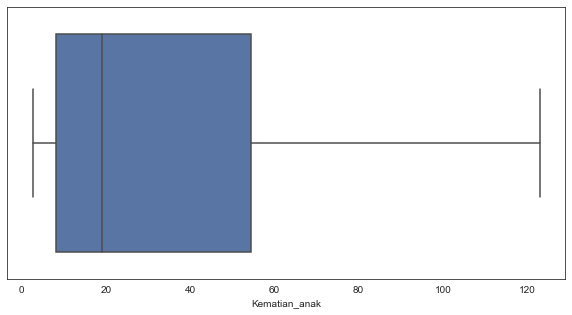

In [29]:
sns.set({'figure.figsize':(10,5)})

with sns.axes_style('white'):
    sns.boxplot(x=df_fullremoved_outliers['Kematian_anak']);

In [30]:
df_new=df_fullremoved_outliers[['Negara','GDPperkapita','Kesehatan']]
df_new

,Negara,GDPperkapita,Kesehatan
0,Afghanistan,553.0,7.58
1,Albania,4090.0,6.55
2,Algeria,4460.0,4.17
3,Angola,3530.0,2.85
4,Antigua and Barbuda,12200.0,6.03
...,...,...,...
162,Vanuatu,2970.0,5.25
163,Venezuela,13500.0,4.91
164,Vietnam,1310.0,6.84
165,Yemen,1310.0,5.18


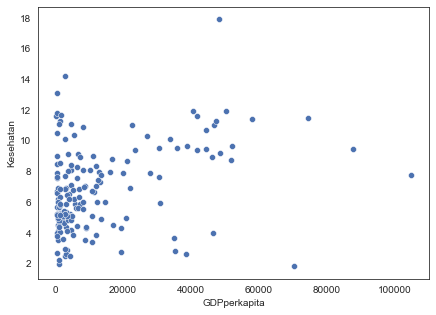

In [31]:
#sebelum remove outlier
sns.set({'figure.figsize':(7,5)})

with sns.axes_style('white'):
    sns.scatterplot(x='GDPperkapita', y='Kesehatan', data=df);

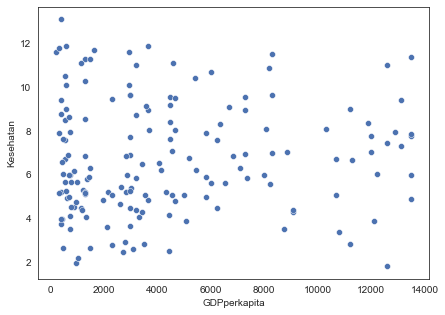

In [32]:
#sebelum remove outlier
sns.set({'figure.figsize':(7,5)})

with sns.axes_style('white'):
    sns.scatterplot(x='GDPperkapita', y='Kesehatan', data=df_new);

In [33]:
#scaling
df_uji = df_new[['GDPperkapita','Kesehatan']]
sc= StandardScaler()
df_uji_std= sc.fit_transform(df_uji.astype('float'))
df_uji_std

array([[-0.98786631,  0.33897544],
       [-0.0800468 , -0.06565444],
       [ 0.01491877, -1.00062444],
       [-0.22377847, -1.51917923],
       [ 2.00149581, -0.2699336 ],
       [ 1.51383478,  0.5432546 ],
       [-0.30334422, -0.9102702 ],
       [-0.30334422,  0.79074666],
       [-0.30334422,  1.68250376],
       [ 0.36911468, -0.32886028],
       [ 0.36911468,  0.46075724],
       [ 0.36911468, -0.68634881],
       [-0.93525025, -1.25597339],
       [-0.93525025,  0.49218481],
       [ 0.41788078, -0.4349283 ],
       [ 0.41788078,  1.5646504 ],
       [-0.01588087, -0.59599457],
       [-0.93525025, -1.02812356],
       [-0.57027447, -0.59599457],
       [-0.62160721, -0.7374186 ],
       [ 0.05341832,  1.72178821],
       [ 0.50001316,  0.62182351],
       [ 1.74483211,  0.90074313],
       [ 1.74483211, -1.52310768],
       [ 0.62577838,  0.06005581],
       [-0.9822197 ,  0.00898602],
       [-1.07051202,  1.91821048],
       [-0.92806366, -0.40742919],
       [-0.79357189,

In [34]:
#uji coba cluster
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(df_uji_std)
labels1 = kmeans1.labels_

In [35]:
new_dfuji_std = pd.DataFrame(data=df_uji_std, columns=['GDPperkapita', 'Kesehatan'])
new_dfuji_std['label_kmeans1'] = labels1
new_dfuji_std

,GDPperkapita,Kesehatan,label_kmeans1
0,-0.987866,0.338975,1
1,-0.080047,-0.065654,1
2,0.014919,-1.000624,1
3,-0.223778,-1.519179,1
4,2.001496,-0.269934,0
...,...,...,...
162,-0.367510,-0.576352,1
163,2.335159,-0.709919,0
164,-0.793572,0.048270,1
165,-0.793572,-0.603851,1


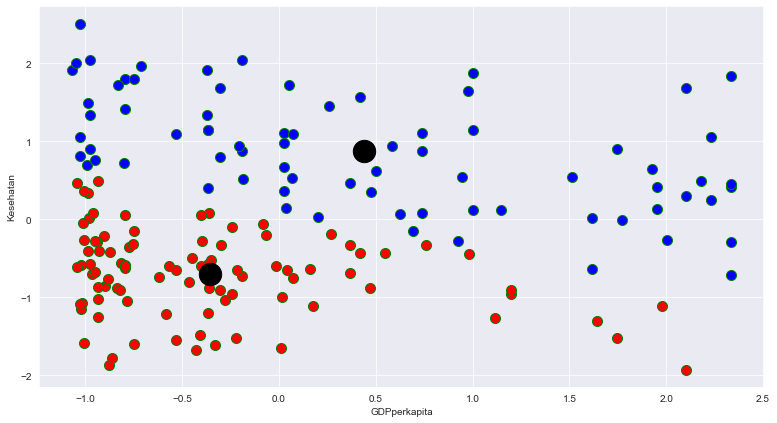

In [36]:
plt.subplots(figsize=(13,7))
plt.scatter(new_dfuji_std.GDPperkapita[new_dfuji_std.label_kmeans1==0], new_dfuji_std.Kesehatan[new_dfuji_std.label_kmeans1==0], c='blue', s=100, edgecolor='green')
plt.scatter(new_dfuji_std.GDPperkapita[new_dfuji_std.label_kmeans1==1], new_dfuji_std.Kesehatan[new_dfuji_std.label_kmeans1==1], c='red', s=100, edgecolor='green')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=500)
plt.xlabel('GDPperkapita')
plt.ylabel('Kesehatan')
plt.show()

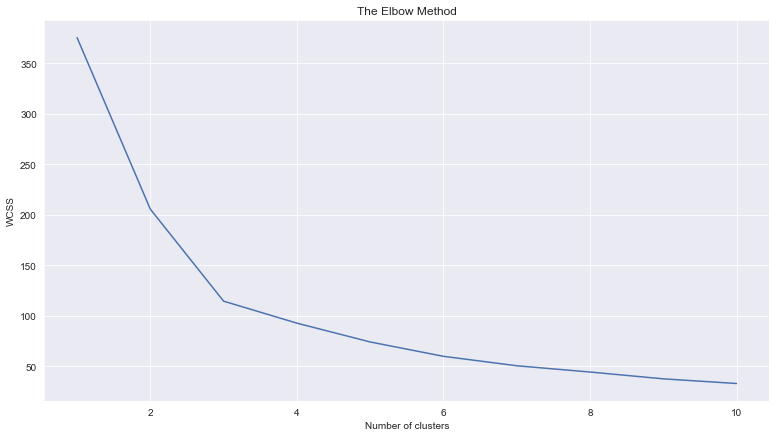

In [41]:
import warnings
warnings.filterwarnings("ignore")

#elbow method
plt.subplots(figsize=(13,7))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_dfuji_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
#uji cluster berdasarkan elbow method
kmeans2 = KMeans(n_clusters=3, random_state=42).fit(df_uji_std)
labels2 = kmeans2.labels_

In [43]:
new_dfuji_std = pd.DataFrame(data=df_uji_std, columns=['GDPperkapita', 'Kesehatan'])
new_dfuji_std['label_kmeans2'] = labels2
new_dfuji_std

,GDPperkapita,Kesehatan,label_kmeans2
0,-0.987866,0.338975,2
1,-0.080047,-0.065654,0
2,0.014919,-1.000624,0
3,-0.223778,-1.519179,0
4,2.001496,-0.269934,1
...,...,...,...
162,-0.367510,-0.576352,0
163,2.335159,-0.709919,1
164,-0.793572,0.048270,0
165,-0.793572,-0.603851,0


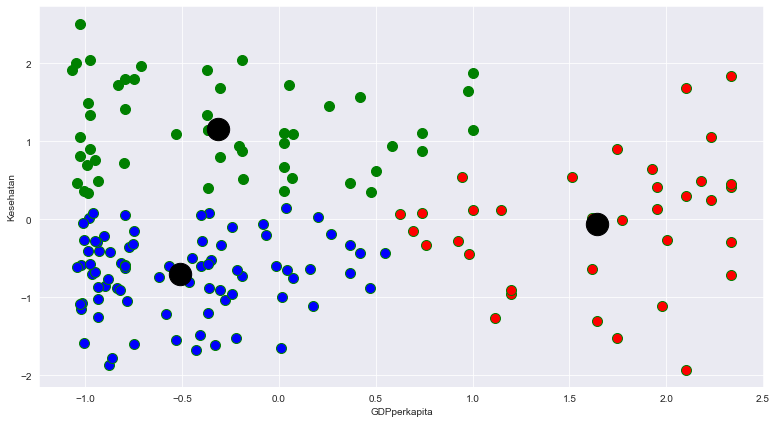

In [44]:
plt.subplots(figsize=(13,7))
plt.scatter(new_dfuji_std.GDPperkapita[new_dfuji_std.label_kmeans2==0], new_dfuji_std.Kesehatan[new_dfuji_std.label_kmeans2==0], c='blue', s=100, edgecolor='green')
plt.scatter(new_dfuji_std.GDPperkapita[new_dfuji_std.label_kmeans2==1], new_dfuji_std.Kesehatan[new_dfuji_std.label_kmeans2==1], c='red', s=100, edgecolor='green')
plt.scatter(new_dfuji_std.GDPperkapita[new_dfuji_std.label_kmeans2==2], new_dfuji_std.Kesehatan[new_dfuji_std.label_kmeans2==2], c='green', s=100, edgecolor='green')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=500)
plt.xlabel('GDPperkapita')
plt.ylabel('Kesehatan')
plt.show()

In [45]:
from sklearn.metrics import silhouette_score

print('Skor n_cluster 2 adalah ', silhouette_score(new_dfuji_std, labels=labels1))
print('Skor n_cluster 3 adalah ', silhouette_score(new_dfuji_std, labels=labels2))

Skor n_cluster 2 adalah  0.45036452655529574
Skor n_cluster 3 adalah  0.5967619317067678


## Negara Mana Saja? ##

In [46]:
df_new['GDPperkapita'] = df_new['GDPperkapita'].astype(int)
df_new

,Negara,GDPperkapita,Kesehatan
0,Afghanistan,553,7.58
1,Albania,4090,6.55
2,Algeria,4460,4.17
3,Angola,3530,2.85
4,Antigua and Barbuda,12200,6.03
...,...,...,...
162,Vanuatu,2970,5.25
163,Venezuela,13500,4.91
164,Vietnam,1310,6.84
165,Yemen,1310,5.18


In [47]:
df_new = df_new.copy()
df_new = df_new.reset_index(drop=True)
df_new.columns = ['Negara', 'GDP', 'Health']
df_new

,Negara,GDP,Health
0,Afghanistan,553,7.58
1,Albania,4090,6.55
2,Algeria,4460,4.17
3,Angola,3530,2.85
4,Antigua and Barbuda,12200,6.03
...,...,...,...
162,Vanuatu,2970,5.25
163,Venezuela,13500,4.91
164,Vietnam,1310,6.84
165,Yemen,1310,5.18


In [48]:
df_akhir = pd.concat([df_new, new_dfuji_std], axis=1)
df_akhir

,Negara,GDP,Health,GDPperkapita,Kesehatan,label_kmeans2
0,Afghanistan,553,7.58,-0.987866,0.338975,2
1,Albania,4090,6.55,-0.080047,-0.065654,0
2,Algeria,4460,4.17,0.014919,-1.000624,0
3,Angola,3530,2.85,-0.223778,-1.519179,0
4,Antigua and Barbuda,12200,6.03,2.001496,-0.269934,1
...,...,...,...,...,...,...
162,Vanuatu,2970,5.25,-0.367510,-0.576352,0
163,Venezuela,13500,4.91,2.335159,-0.709919,1
164,Vietnam,1310,6.84,-0.793572,0.048270,0
165,Yemen,1310,5.18,-0.793572,-0.603851,0


In [49]:
df_cluster0 = df_akhir['label_kmeans2'] == 0
df_k0 = df_akhir[(df_cluster0)]
df_k0
#kluster biru

,Negara,GDP,Health,GDPperkapita,Kesehatan,label_kmeans2
1,Albania,4090,6.55,-0.080047,-0.065654,0
2,Algeria,4460,4.17,0.014919,-1.000624,0
3,Angola,3530,2.85,-0.223778,-1.519179,0
6,Armenia,3220,4.40,-0.303344,-0.910270,0
9,Azerbaijan,5840,5.88,0.369115,-0.328860,0
...,...,...,...,...,...,...
161,Uzbekistan,1380,5.81,-0.775605,-0.356359,0
162,Vanuatu,2970,5.25,-0.367510,-0.576352,0
164,Vietnam,1310,6.84,-0.793572,0.048270,0
165,Yemen,1310,5.18,-0.793572,-0.603851,0


In [50]:
df_cluster1 = df_akhir['label_kmeans2'] == 1
df_k1 = df_akhir[(df_cluster1)]
df_k1
#kluster merah

,Negara,GDP,Health,GDPperkapita,Kesehatan,label_kmeans2
4,Antigua and Barbuda,12200,6.03,2.001496,-0.269934,1
5,Argentina,10300,8.10,1.513835,0.543255,1
22,Brazil,11200,9.01,1.744832,0.900743,1
23,Brunei,11200,2.84,1.744832,-1.523108,1
24,Bulgaria,6840,6.87,0.625778,0.060056,1
33,Chile,12900,7.96,2.181160,0.488256,1
41,Croatia,13500,7.76,2.335159,0.409687,1
42,Cyprus,13500,5.97,2.335159,-0.293504,1
43,Czech Republic,13500,7.88,2.335159,0.456829,1
44,Denmark,13500,11.40,2.335159,1.839642,1


In [51]:
df_cluster2 = df_akhir['label_kmeans2'] == 2
df_k2 = df_akhir[(df_cluster2)]
df_k2
#kluster hijau

,Negara,GDP,Health,GDPperkapita,Kesehatan,label_kmeans2
0,Afghanistan,553,7.58,-0.987866,0.338975,2
7,Australia,3220,8.73,-0.303344,0.790747,2
8,Austria,3220,11.00,-0.303344,1.682504,2
10,Bahamas,5840,7.89,0.369115,0.460757,2
13,Barbados,758,7.97,-0.935250,0.492185,2
15,Belgium,6030,10.70,0.417881,1.564650,2
20,Bosnia and Herzegovina,4610,11.10,0.053418,1.721788,2
21,Botswana,6350,8.30,0.500013,0.621824,2
26,Burundi,231,11.60,-1.070512,1.918210,2
29,Canada,1310,11.30,-0.793572,1.800357,2


In [467]:
writer = pd.ExcelWriter('df_cluster0.xlsx')
df_k0.to_excel(writer)
writer.save()

In [473]:
df_k0[['Negara','GDP','Health']].sort_values(by=['GDP','Health'], ascending=True).head(10).reset_index(drop=True)

,Negara,GDP,Health
0,Niger,348,5.16
1,Singapore,399,3.96
2,Madagascar,413,3.77
3,Mozambique,419,5.21
4,Central African Republic,446,3.98
5,Malawi,459,6.59
6,Eritrea,482,2.66
7,Estonia,482,6.03
8,Gambia,562,5.69
9,Burkina Faso,575,6.74


Di atas adalah beberapa negara kluster biru yang harus menjadi prioritas utama HELP dengan melihat nilai GDP dan Health yang sangat rendah.

In [52]:
df_k0[['Negara','GDP','Health']].sort_values(by=['Health'], ascending=True).head(10).reset_index(drop=True)

,Negara,GDP,Health
0,Myanmar,988,1.97
1,Pakistan,1040,2.20
2,"Congo, Rep.",2740,2.46
3,Turkmenistan,4440,2.50
4,Indonesia,3110,2.61
5,Kuwait,1490,2.63
6,Eritrea,482,2.66
7,Oman,2330,2.77
8,Angola,3530,2.85
9,Sri Lanka,2810,2.94


Di atas adalah beberapa negara kluster biru yang masih perlu menjadi prioritas HELP dengan melihat Health yang sangat rendah dengan GDP yang masih kurang dari standar.